In [83]:
import sys
!{sys.executable} -m pip install nltk --quiet
!{sys.executable} -m pip install wordcloud --quiet
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords

In [84]:
df = pd.read_csv('MENTAL HEALTH.csv')
print(df.head())

C:\Users\91938\AppData\Local\Temp\ipykernel_4700\3527673268.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MENTAL HEALTH.csv')


                                               Title  \
0                            exposure does not work!   
1  Panic attack? derealization? can't go to docto...   
2                 How long can a panic attack last?!   
3                                    Stepping stones   
4  Coping with anxiety over climate change, on th...   

                                                Text Subreddit Unnamed: 3  \
0  I have struggled with social anxiety from chil...   Anxiety        NaN   
1  Back in March (I know, a while ago D:), I woke...   Anxiety        NaN   
2  I've been withdrawing from medicines lately (e...   Anxiety        NaN   
3  First time poster, long time lurker. \n\nI've ...   Anxiety        NaN   
4  Hi all,\n\nI made a throwaway account as my ma...   Anxiety        NaN   

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ...  \
0        NaN        NaN        NaN        NaN        NaN        NaN  ...   
1        NaN        NaN        NaN        NaN   

In [85]:
print(df.columns)

Index(['Title', 'Text', 'Subreddit', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58',
       'Unnamed: 59', 'Unnamed: 60', 'U

In [86]:
print("SHAPE BEFORE CLEANING: ", df.shape)

SHAPE BEFORE CLEANING:  (488738, 79)


In [87]:
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]
print(df.head())

                                               Title  \
0                            exposure does not work!   
1  Panic attack? derealization? can't go to docto...   
2                 How long can a panic attack last?!   
3                                    Stepping stones   
4  Coping with anxiety over climate change, on th...   

                                                Text Subreddit  
0  I have struggled with social anxiety from chil...   Anxiety  
1  Back in March (I know, a while ago D:), I woke...   Anxiety  
2  I've been withdrawing from medicines lately (e...   Anxiety  
3  First time poster, long time lurker. \n\nI've ...   Anxiety  
4  Hi all,\n\nI made a throwaway account as my ma...   Anxiety  


In [88]:
print(df.columns)

Index(['Title', 'Text', 'Subreddit'], dtype='object')


In [89]:
print("SHAPE AFTER CLEANING: ", df.shape)

SHAPE AFTER CLEANING:  (488738, 3)


In [90]:
df['Combined'] = df['Title'].fillna('') + ' ' + df['Text'].fillna('')

In [91]:
df.head

<bound method NDFrame.head of                                                     Title  \
0                                 exposure does not work!   
1       Panic attack? derealization? can't go to docto...   
2                      How long can a panic attack last?!   
3                                         Stepping stones   
4       Coping with anxiety over climate change, on th...   
...                                                   ...   
488733                 Religion and paranoid conversation   
488734  Isn't this a little weird for being tardive dy...   
488735  Is this a symptom of schizophrenia or somethin...   
488736  Anyone seen the new Black Mirror episode Bande...   
488737   My girlfriend of over 1 year and I just broke up   

                                                     Text      Subreddit  \
0       I have struggled with social anxiety from chil...        Anxiety   
1       Back in March (I know, a while ago D:), I woke...        Anxiety   
2       I

In [92]:
df['Combined'] = df['Combined'].str.lower()
df['Combined'] = df['Combined'].str.replace(r'[^a-z\s]', '', regex=True)
df.head

<bound method NDFrame.head of                                                     Title  \
0                                 exposure does not work!   
1       Panic attack? derealization? can't go to docto...   
2                      How long can a panic attack last?!   
3                                         Stepping stones   
4       Coping with anxiety over climate change, on th...   
...                                                   ...   
488733                 Religion and paranoid conversation   
488734  Isn't this a little weird for being tardive dy...   
488735  Is this a symptom of schizophrenia or somethin...   
488736  Anyone seen the new Black Mirror episode Bande...   
488737   My girlfriend of over 1 year and I just broke up   

                                                     Text      Subreddit  \
0       I have struggled with social anxiety from chil...        Anxiety   
1       Back in March (I know, a while ago D:), I woke...        Anxiety   
2       I

In [93]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['Combined'] = df['Combined'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91938\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

df['Combined'] = df['Combined'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91938\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91938\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [95]:
print("Lemmatized Text Samples: \n")
for i in range(5):
    print(f"Post #{i + 1}: ")
    print(df['Combined'].iloc[i])
    print("-" * 80)

Lemmatized Text Samples: 

Post #1: 
exposure work struggled social anxiety childhood main advice friend selfhelp book professional expose environment im better example get anxious every single time go shop even though shopping daily weekly since get nervous sweaty heart pounding every time go gym yet working gym year exposure worked anyone else
--------------------------------------------------------------------------------
Post #2: 
panic attack derealization cant go doctor advice appreciated back march know ago woke day go school feeling kind felt depressed didnt really feel like getting even seeing anyone history p really mainly happens winter time get highly anxious also going anywhere period time get suspicious paranoid everyone anything usually end isolating room eat way less also get highly irritable emotional like one time mom sent store milk started cry store thought going killed watched believe period watched government something higher power im gerbil study something like t

In [96]:
df = df[df['Combined'].str.len() > 10]
df.isnull().values.any()
df.isnull().sum().sum()
df.isnull().sum()

Title         5
Text         21
Subreddit    59
Combined      0
dtype: int64

In [97]:
df[df.isnull().any(axis=1)]

,Title,Text,Subreddit,Combined
51758,"I Popped My Psych-Ward Cherry, Part II (Length...","Original Post \(possibly required reading, bu...",NaN,popped psychward cherry part ii lengthy amp vu...
51775,I’m maybe a society 6 but apparently a psych\-...,NaN,NaN,im maybe society apparently psychward
51777,"To Possibly Be Continued…""",Anxiety,NaN,possibly continued anxiety
88313,I am not asking for diagnosis.Just want to get...,Note: If you found your comments here is becau...,NaN,asking diagnosisjust want get rid doubt misdia...
88321,Things I read on this subreddit and i relate to:,NaN,NaN,thing read subreddit relate
...,...,...,...,...
480617,Title: Keratitis caused by a rare fungus,Malassezia restricta \(NCBI; US National Libr...,NaN,title keratitis caused rare fungus malassezia ...
480621,Title: Identification of Fungal Species in Bra...,NaN,NaN,title identification fungal specie brain tissu...
480625,§ “About 36 per cent of people with Alzheimer'...,study suggests; ScienceDaily; 2017\).,NaN,per cent people alzheimers thought delusion pe...
480627,Title: Schizophrenia as a prostaglandin defici...,NaN,NaN,title schizophrenia prostaglandin deficiency d...


In [98]:
df.dropna(subset=['Title', 'Text', 'Subreddit', 'Combined'], inplace=True)

C:\Users\91938\AppData\Local\Temp\ipykernel_4700\724578079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Title', 'Text', 'Subreddit', 'Combined'], inplace=True)


In [99]:
df.reset_index(drop=True, inplace=True)

In [100]:
df['Text'] = df['Text'].str.replace('\n', ' ', regex=True)
df['Title'] = df['Title'].str.replace('\n', ' ', regex=True)
df['Combined'] = df['Combined'].str.replace('\n', ' ', regex=True)

C:\Users\91938\AppData\Local\Temp\ipykernel_4700\3396328298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].str.replace('\n', ' ', regex=True)
C:\Users\91938\AppData\Local\Temp\ipykernel_4700\3396328298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].str.replace('\n', ' ', regex=True)
C:\Users\91938\AppData\Local\Temp\ipykernel_4700\3396328298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [101]:
df.isnull().values.any()
df.isnull().sum().sum()
df.isnull().sum()

Title        0
Text         0
Subreddit    0
Combined     0
dtype: int64

In [102]:
from IPython.display import display
display(df)

,Title,Text,Subreddit,Combined
0,exposure does not work!,I have struggled with social anxiety from chil...,Anxiety,exposure work struggled social anxiety childho...
1,Panic attack? derealization? can't go to docto...,"Back in March (I know, a while ago D:), I woke...",Anxiety,panic attack derealization cant go doctor advi...
2,How long can a panic attack last?!,I've been withdrawing from medicines lately (e...,Anxiety,long panic attack last ive withdrawing medicin...
3,Stepping stones,"First time poster, long time lurker. I've ha...",Anxiety,stepping stone first time poster long time lur...
4,"Coping with anxiety over climate change, on th...","Hi all, I made a throwaway account as my main...",Anxiety,coping anxiety climate change verge considerin...
...,...,...,...,...
488365,Religion and paranoid conversation,Ok! I've got a rant to make and a conversation...,schizophrenia,religion paranoid conversation ok ive got rant...
488366,Isn't this a little weird for being tardive dy...,"When I wake up, I rarely have any tics in my t...",schizophrenia,isnt little weird tardive dyskinesia wake rare...
488367,Is this a symptom of schizophrenia or somethin...,I’m not sure if this is schizophrenia (or perh...,schizophrenia,symptom schizophrenia something else im sure s...
488368,Anyone seen the new Black Mirror episode Bande...,Although I don't think it was stated what Stef...,schizophrenia,anyone seen new black mirror episode bandersna...


C:\Users\91938\AppData\Local\Temp\ipykernel_4700\2076999871.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


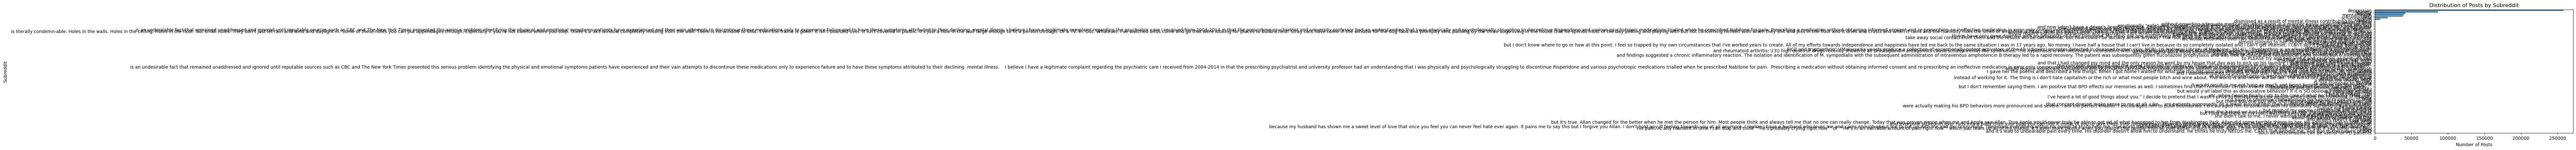

In [103]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Subreddit', data=df, order=df['Subreddit'].value_counts().index)
plt.title('Distribution of Posts by Subreddit')
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.tight_layout()
plt.show()

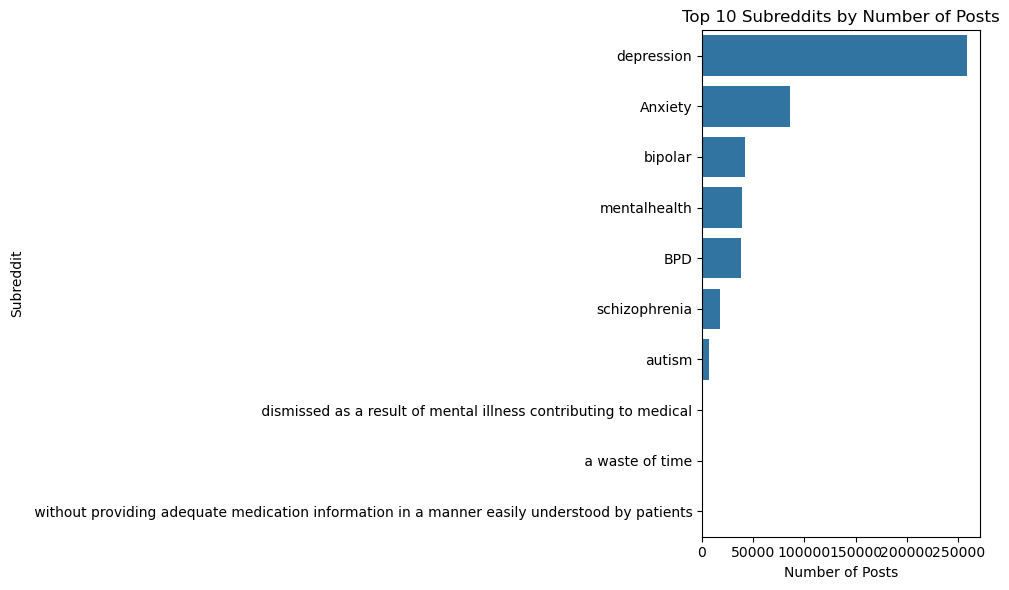

In [104]:
# Select top 10 subreddits by frequency
top_subreddits = df['Subreddit'].value_counts().nlargest(10).index

# Filter DataFrame
filtered_df = df[df['Subreddit'].isin(top_subreddits)]

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(y='Subreddit', data=filtered_df, order=top_subreddits)
plt.title('Top 10 Subreddits by Number of Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.tight_layout()
plt.show()

In [105]:
# Define the valid subreddits you want to keep
valid_subreddits = ['depression', 'Anxiety', 'bipolar', 'mentalhealth', 'BPD', 'schizophrenia', 'autism']

# Replace all other subreddit values with NaN
df['Subreddit'] = df['Subreddit'].where(df['Subreddit'].isin(valid_subreddits))

# Drop rows where 'subreddit' is NaN (i.e., invalid or unwanted subreddits)
df.dropna(subset=['Subreddit'], inplace=True)
df.isnull().values.any()

C:\Users\91938\AppData\Local\Temp\ipykernel_4700\901992291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subreddit'] = df['Subreddit'].where(df['Subreddit'].isin(valid_subreddits))
C:\Users\91938\AppData\Local\Temp\ipykernel_4700\901992291.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Subreddit'], inplace=True)


False

In [106]:
df.reset_index(drop=True, inplace=True)
print("SHAPE AFTER CLEANING: ", df.shape)

SHAPE AFTER CLEANING:  (488290, 4)


In [107]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [108]:
def simple_clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [109]:
import numpy as np

top_words_per_class = defaultdict(list)
vectorizer = CountVectorizer(max_features=1000)
for sub in df['Subreddit'].unique():
    texts = df[df['Subreddit'] == sub]['Combined']
    X = vectorizer.fit_transform(texts)
    word_freq = np.asarray(X.sum(axis=0)).flatten()
    vocab = vectorizer.get_feature_names_out()
    freq_dict = dict(zip(vocab, word_freq))
    sorted_words = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    top_words_per_class[sub] = sorted_words

In [110]:
top_words_per_class_df = pd.DataFrame({k: dict(v) for k, v in top_words_per_class.items()})
display(top_words_per_class_df)

,Anxiety,BPD,depression,autism,mentalhealth,bipolar,schizophrenia
im,175984.0,77657.0,572321.0,8736.0,91399.0,76890.0,25541.0
anxiety,134971.0,NaN,NaN,NaN,NaN,NaN,NaN
like,108884.0,55336.0,357849.0,6944.0,64663.0,42270.0,17842.0
feel,95581.0,48372.0,347381.0,NaN,55272.0,34966.0,11124.0
get,76372.0,28694.0,215583.0,4726.0,39487.0,26855.0,9677.0
dont,74699.0,39915.0,348088.0,4837.0,53528.0,30728.0,12483.0
ive,70119.0,27623.0,208386.0,NaN,37206.0,30047.0,8927.0
time,65522.0,29001.0,203922.0,3930.0,38434.0,26461.0,9591.0
know,65359.0,35717.0,236562.0,4814.0,43139.0,26539.0,11030.0
really,54580.0,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
print(df.head())

                                               Title  \
0                            exposure does not work!   
1  Panic attack? derealization? can't go to docto...   
2                 How long can a panic attack last?!   
3                                    Stepping stones   
4  Coping with anxiety over climate change, on th...   

                                                Text Subreddit  \
0  I have struggled with social anxiety from chil...   Anxiety   
1  Back in March (I know, a while ago D:), I woke...   Anxiety   
2  I've been withdrawing from medicines lately (e...   Anxiety   
3  First time poster, long time lurker.   I've ha...   Anxiety   
4  Hi all,  I made a throwaway account as my main...   Anxiety   

                                            Combined  
0  exposure work struggled social anxiety childho...  
1  panic attack derealization cant go doctor advi...  
2  long panic attack last ive withdrawing medicin...  
3  stepping stone first time poster long time 

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=5000)

In [113]:
# Drop classes with fewer than 2 samples
min_samples = 2
class_counts = df['Subreddit'].value_counts()
valid_classes = class_counts[class_counts >= min_samples].index
df = df[df['Subreddit'].isin(valid_classes)]

# Recreate features after filtering
X = vectorizer.fit_transform(df['Combined'])
y = df['Subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(y.value_counts())

Subreddit
depression       258392
Anxiety           86228
bipolar           41477
mentalhealth      39369
BPD               38191
schizophrenia     17492
autism             7141
Name: count, dtype: int64


In [114]:
print("Train Set Class Distribution:\n", y_train.value_counts(normalize=True))
print("\nTest Set Class Distribution:\n", y_test.value_counts(normalize=True))

Train Set Class Distribution:
 Subreddit
depression       0.529176
Anxiety          0.176591
bipolar          0.084944
mentalhealth     0.080626
BPD              0.078214
schizophrenia    0.035824
autism           0.014625
Name: proportion, dtype: float64

Test Set Class Distribution:
 Subreddit
depression       0.529183
Anxiety          0.176596
bipolar          0.084939
mentalhealth     0.080628
BPD              0.078212
schizophrenia    0.035819
autism           0.014622
Name: proportion, dtype: float64


In [115]:
import imodels
!pip install rulefit --quiet
from rulefit import RuleFit

In [182]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2

In [184]:
K = 2000  # try 2k–10k depending on RAM/accuracy
selector = SelectKBest(chi2, k=min(K, X_train.shape[1])).fit(X_train, y_train)
X_train_fs = selector.transform(X_train)
X_test_fs  = selector.transform(X_test)

In [186]:
try:
    names = vectorizer.get_feature_names_out()
except Exception:
    names = vectorizer.get_feature_names()
feature_names_fs = np.array(names)[selector.get_support()]

In [188]:
row_budget_mb = 400
bytes_per_row = X_train_fs.shape[1] * 4  # float32
max_rows = max(5000, int((row_budget_mb * 1024 * 1024) / bytes_per_row))
n_rows = min(X_train_fs.shape[0], max_rows)


In [190]:
rng = np.random.RandomState(42)
idx = rng.choice(X_train_fs.shape[0], size=n_rows, replace=False)

X_train_sub = X_train_fs[idx].toarray().astype("float32")  # small dense block
y_train_sub = np.asarray(y_train)[idx]

In [191]:
def evaluate(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1m = f1_score(y_true, y_pred, average="macro")
    print(f"\n=== {model_name} ===")
    print(f"Accuracy: {acc:.4f} | Macro-F1: {f1m:.4f}")
    print(classification_report(y_true, y_pred, digits=4))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
    return {"model": model_name, "accuracy": acc, "macro_f1": f1m}

In [192]:
log_reg = LogisticRegression(solver="saga", penalty="l2", C=1.0, max_iter=5000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print(classification_report(y_test, y_pred_lr))

               precision    recall  f1-score   support

      Anxiety       0.79      0.75      0.77     17246
          BPD       0.82      0.58      0.68      7638
       autism       0.91      0.68      0.78      1428
      bipolar       0.81      0.61      0.69      8295
   depression       0.78      0.94      0.85     51679
 mentalhealth       0.49      0.25      0.33      7874
schizophrenia       0.71      0.49      0.58      3498

     accuracy                           0.77     97658
    macro avg       0.76      0.61      0.67     97658
 weighted avg       0.76      0.77      0.76     97658



In [195]:
dt = DecisionTreeClassifier(max_depth=25, min_samples_leaf=2, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

               precision    recall  f1-score   support

      Anxiety       0.75      0.66      0.70     17246
          BPD       0.83      0.44      0.58      7638
       autism       0.85      0.52      0.64      1428
      bipolar       0.77      0.47      0.59      8295
   depression       0.71      0.93      0.80     51679
 mentalhealth       0.32      0.12      0.17      7874
schizophrenia       0.67      0.32      0.44      3498

     accuracy                           0.71     97658
    macro avg       0.70      0.49      0.56     97658
 weighted avg       0.70      0.71      0.68     97658



In [198]:
from rulefit import RuleFit
from sklearn.ensemble import GradientBoostingClassifier

rf = RuleFit(
    tree_generator=GradientBoostingClassifier(
        n_estimators=100, max_depth=3, learning_rate=0.10,
        subsample=0.6, max_features='sqrt',
        n_iter_no_change=5, validation_fraction=0.1,
        random_state=42
    ),
    rfmode="classification",
    max_rules=800, tree_size=3, sample_fract=0.5,
    lin_standardise=True, random_state=42
)
rf.fit(X_train_sub, y_train_sub, feature_names=feature_names_fs)


RuleFit(max_rules=800, random_state=42, rfmode='classification',
        sample_fract=0.5,
        tree_generator=GradientBoostingClassifier(max_features='sqrt',
                                                  max_leaf_nodes=2,
                                                  n_estimators=310,
                                                  n_iter_no_change=5,
                                                  random_state=351,
                                                  subsample=0.6),
        tree_size=3)

In [202]:
def predict_in_batches(model, X_csr, batch_mb=250):
    n, d = X_csr.shape
    bsz = max(1, int((batch_mb*1024*1024) / (d * 4)))  # float32 rows per batch
    preds = []
    for start in range(0, n, bsz):
        chunk = X_csr[start:start+bsz].toarray().astype("float32")
        preds.append(model.predict(chunk))
        del chunk
    return np.concatenate(preds)

y_pred_rf = predict_in_batches(rf, X_test_fs, batch_mb=200)

In [208]:
acc = accuracy_score(y_test, y_pred_rf)
f1m = f1_score(y_test, y_pred_rf, average="macro")
print(f"Accuracy: {acc:.2f} | Macro-F1: {f1m:.2f}\n")
print(classification_report(y_test, y_pred_rf, digits=4))

Accuracy: 0.71 | Macro-F1: 0.53

               precision    recall  f1-score   support

      Anxiety     0.7418    0.7610    0.7513     17246
          BPD     0.5186    0.5941    0.5538      7638
       autism     0.3866    0.4741    0.4259      1428
      bipolar     0.5303    0.6025    0.5641      8295
   depression     0.8114    0.8398    0.8253     51679
 mentalhealth     0.4020    0.2377    0.2988      7874
schizophrenia     0.4619    0.2499    0.3243      3498

     accuracy                         0.7115     97658
    macro avg     0.5504    0.5370    0.5348     97658
 weighted avg     0.7006    0.7115    0.7026     97658



In [206]:
import numpy as np, pandas as pd
# use label encoder classes if you have one; otherwise infer from data
classes = (getattr(globals().get("le", None), "classes_", None) 
           or np.unique(np.concatenate([np.asarray(y_test), y_pred_rf])))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=classes)
cm_df = pd.DataFrame(cm, index=classes, columns=classes)
print("Confusion Matrix:")
display(cm_df)


Confusion Matrix:


,Anxiety,BPD,autism,bipolar,depression,mentalhealth,schizophrenia
Anxiety,13125,536,140,565,2272,468,140
BPD,359,4538,100,402,1947,216,76
autism,109,114,677,102,282,92,52
bipolar,441,533,70,4998,1770,277,206
depression,2171,2075,346,1924,43399,1465,299
mentalhealth,1227,681,265,687,2897,1872,245
schizophrenia,262,274,153,747,921,267,874


In [210]:
rules = rf.get_rules()
rules = rules[(rules.coef != 0) & (rules.support > 0)].copy()

# Top 25 rules/terms by importance
cols = [c for c in ["rule", "support", "coef", "importance", "feature", "type"] if c in rules.columns]
top_rules = rules.sort_values("importance", ascending=False)
print("\nTop 25 RuleFit rules/terms:")
display(top_rules[cols].head(25))

# Strongest linear terms only (original features/words)
if "type" in rules.columns:
    linear_terms = rules[rules["type"] == "linear"].copy()
else:
    linear_terms = rules[rules["rule"].astype(str).str.startswith("Linear term")].copy()

if not linear_terms.empty:
    linear_terms = linear_terms.reindex(linear_terms["coef"].abs().sort_values(ascending=False).index)
    print("\nTop 15 linear terms by |coef|:")
    display(linear_terms[[c for c in ["feature","coef","importance","support","type"] if c in linear_terms.columns]].head(15))



Top 25 RuleFit rules/terms:


,rule,support,coef,importance,type
2311,bpd > 0.023067763075232506 & happiness <= 0.03...,0.034156,-3.891124,0.706747,rule
451,depression,1.000000,-15.697364,0.647748,linear
129,attack,1.000000,-27.462135,0.615209,linear
83,anxiety,1.000000,11.834975,0.587108,linear
449,depressed,1.000000,-17.559992,0.559038,linear
890,illness,1.000000,32.123761,0.376340,linear
221,bpd,1.000000,-19.309230,0.324005,linear
190,bipolar,1.000000,-15.766866,0.301191,linear
2704,illness > 0.011734419036656618,0.035605,-1.615102,0.299282,rule
2441,empty > 0.0437284279614687,0.027339,-1.768319,0.288360,rule



Top 15 linear terms by |coef|:


,coef,importance,support,type
890,32.123761,0.376340,1.0,linear
129,-27.462135,0.615209,1.0,linear
1906,-25.860936,0.051895,1.0,linear
585,25.730693,0.241101,1.0,linear
1139,-20.376729,0.223227,1.0,linear
538,20.376382,0.031880,1.0,linear
221,-19.309230,0.324005,1.0,linear
247,17.640069,0.091827,1.0,linear
449,-17.559992,0.559038,1.0,linear
190,-15.766866,0.301191,1.0,linear


In [214]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import numpy as np, pandas as pd

acc = accuracy_score(y_test, y_pred_rf)
f1m = f1_score(y_test, y_pred_rf, average="macro")
print(f"Accuracy: {acc:.4f} | Macro-F1: {f1m:.4f}\n")
print(classification_report(y_test, y_pred_rf, digits=4))

# Confusion matrix with readable labels
classes = (getattr(globals().get("le", None), "classes_", None)
           or np.unique(np.concatenate([np.asarray(y_test), y_pred_rf])))
cm = confusion_matrix(y_test, y_pred_rf, labels=classes)
display(pd.DataFrame(cm, index=classes, columns=classes))


Accuracy: 0.7115 | Macro-F1: 0.5348

               precision    recall  f1-score   support

      Anxiety     0.7418    0.7610    0.7513     17246
          BPD     0.5186    0.5941    0.5538      7638
       autism     0.3866    0.4741    0.4259      1428
      bipolar     0.5303    0.6025    0.5641      8295
   depression     0.8114    0.8398    0.8253     51679
 mentalhealth     0.4020    0.2377    0.2988      7874
schizophrenia     0.4619    0.2499    0.3243      3498

     accuracy                         0.7115     97658
    macro avg     0.5504    0.5370    0.5348     97658
 weighted avg     0.7006    0.7115    0.7026     97658



,Anxiety,BPD,autism,bipolar,depression,mentalhealth,schizophrenia
Anxiety,13125,536,140,565,2272,468,140
BPD,359,4538,100,402,1947,216,76
autism,109,114,677,102,282,92,52
bipolar,441,533,70,4998,1770,277,206
depression,2171,2075,346,1924,43399,1465,299
mentalhealth,1227,681,265,687,2897,1872,245
schizophrenia,262,274,153,747,921,267,874


In [216]:
rules = rf.get_rules()
rules = rules[(rules.coef != 0) & (rules.support > 0)].copy()
cols = [c for c in ["rule","support","coef","importance","feature","type"] if c in rules.columns]

print("\nTop 25 RuleFit rules/terms:")
display(rules.sort_values("importance", ascending=False)[cols].head(25))

# strongest linear terms (original words)
if "type" in rules.columns:
    linear_terms = rules[rules["type"] == "linear"].copy()
else:
    linear_terms = rules[rules["rule"].astype(str).str.startswith("Linear term")].copy()

if not linear_terms.empty:
    linear_terms = linear_terms.reindex(linear_terms["coef"].abs().sort_values(ascending=False).index)
    print("\nTop 15 linear terms by |coef|:")
    display(linear_terms[[c for c in ["feature","coef","importance","support","type"] if c in linear_terms.columns]].head(15))



Top 25 RuleFit rules/terms:


,rule,support,coef,importance,type
2311,bpd > 0.023067763075232506 & happiness <= 0.03...,0.034156,-3.891124,0.706747,rule
451,depression,1.000000,-15.697364,0.647748,linear
129,attack,1.000000,-27.462135,0.615209,linear
83,anxiety,1.000000,11.834975,0.587108,linear
449,depressed,1.000000,-17.559992,0.559038,linear
890,illness,1.000000,32.123761,0.376340,linear
221,bpd,1.000000,-19.309230,0.324005,linear
190,bipolar,1.000000,-15.766866,0.301191,linear
2704,illness > 0.011734419036656618,0.035605,-1.615102,0.299282,rule
2441,empty > 0.0437284279614687,0.027339,-1.768319,0.288360,rule



Top 15 linear terms by |coef|:


,coef,importance,support,type
890,32.123761,0.376340,1.0,linear
129,-27.462135,0.615209,1.0,linear
1906,-25.860936,0.051895,1.0,linear
585,25.730693,0.241101,1.0,linear
1139,-20.376729,0.223227,1.0,linear
538,20.376382,0.031880,1.0,linear
221,-19.309230,0.324005,1.0,linear
247,17.640069,0.091827,1.0,linear
449,-17.559992,0.559038,1.0,linear
190,-15.766866,0.301191,1.0,linear


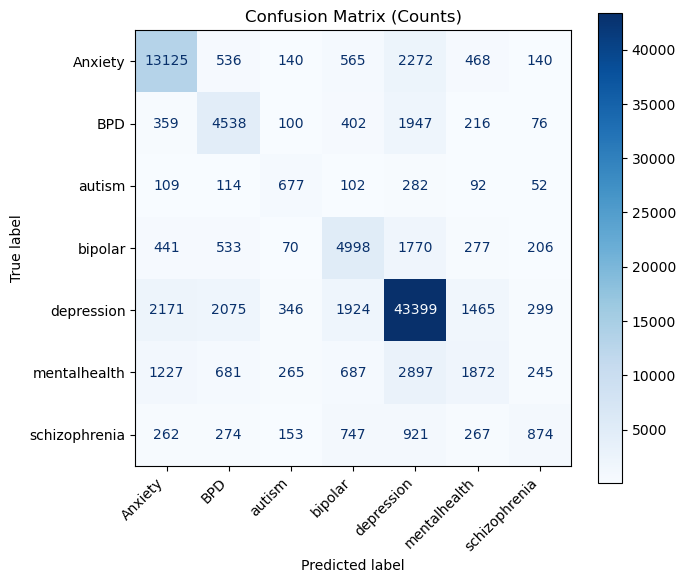

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# class names (use your label encoder if you have one)
classes = (getattr(globals().get("le", None), "classes_", None)
           or np.unique(np.concatenate([np.asarray(y_test), y_pred_rf])))

cm = confusion_matrix(y_test, y_pred_rf, labels=classes)

fig, ax = plt.subplots(figsize=(7,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(include_values=True, cmap=plt.cm.Blues, ax=ax, colorbar=True)
ax.set_title("Confusion Matrix (Counts)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


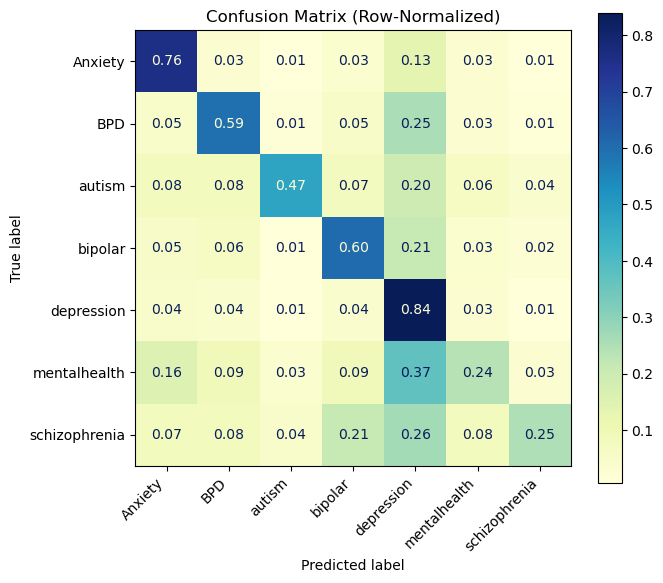

In [220]:
cm_norm = confusion_matrix(y_test, y_pred_rf, labels=classes, normalize="true")

fig, ax = plt.subplots(figsize=(7,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=classes)
disp.plot(include_values=True, cmap=plt.cm.YlGnBu, ax=ax, colorbar=True, values_format=".2f")
ax.set_title("Confusion Matrix (Row-Normalized)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


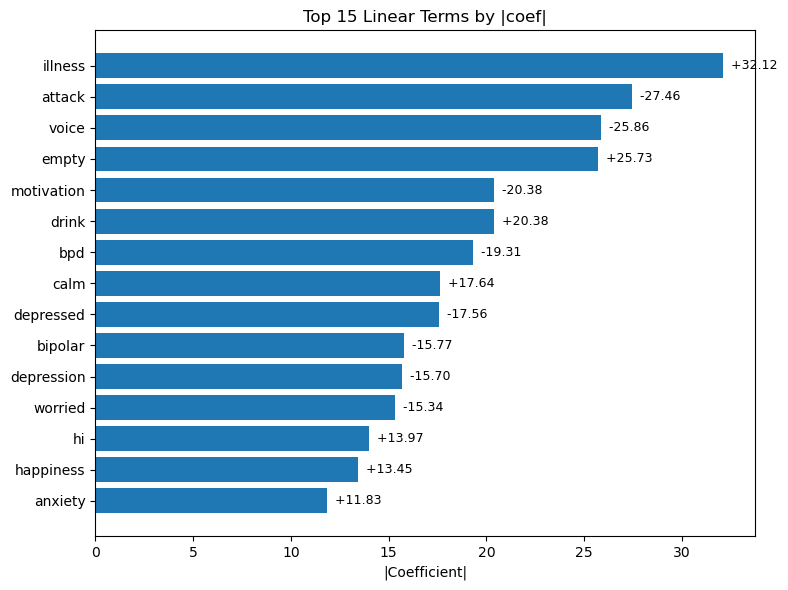

In [250]:
if not linear_terms.empty:
    # sort by |coef| and keep top 15
    lt = linear_terms.copy()
    lt["abs_coef"] = lt["coef"].abs()
    lt = lt.sort_values("abs_coef", ascending=False).head(15)

    # Resolve the display name for each term
    if "feature" in lt.columns and lt["feature"].notna().any():
        lt["term"] = lt["feature"].astype(str)
    elif "rule" in rules.columns:
        # use the 'rule' text from the full rules df (same indices)
        lt["term"] = rules.loc[lt.index, "rule"].astype(str)
    else:
        # last-resort: show the index as the id
        lt["term"] = lt.index.astype(str)

    # Make a horizontal bar plot of |coef|
    fig, ax = plt.subplots(figsize=(8, 6))
    # reverse order so the largest bar is at the top
    lt_plot = lt.iloc[::-1]

    ax.barh(lt_plot["term"], lt_plot["abs_coef"])
    ax.set_xlabel("|Coefficient|")
    ax.set_title("Top 15 Linear Terms by |coef|")

    # annotate each bar with the signed coefficient (e.g., +12.35 / -7.42)
    for i, (v, s) in enumerate(zip(lt_plot["abs_coef"], lt_plot["coef"])):
        ax.text(v, i, f"  {s:+.2f}", va="center", ha="left", fontsize=9)

    plt.tight_layout()
    plt.show()


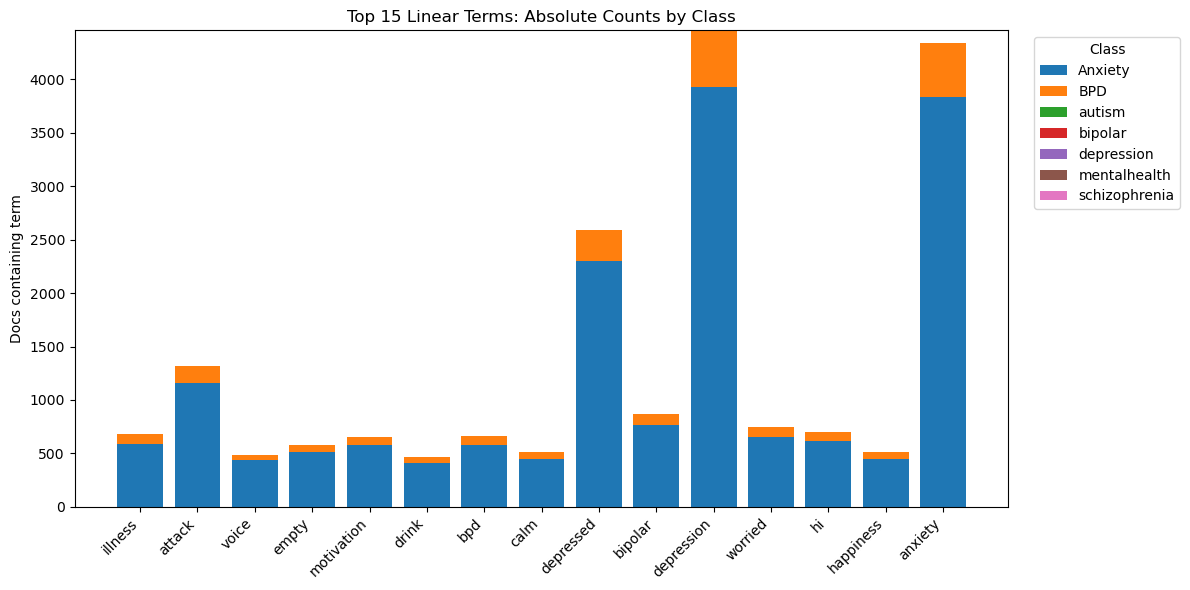

In [252]:
# If you prefer raw counts instead of shares:
fig, ax = plt.subplots(figsize=(12, 6))
bottom = np.zeros(len(valid_terms))
x = np.arange(len(valid_terms))

for cls in classes:
    ax.bar(x, counts.loc[cls].values, bottom=bottom, label=str(cls))
    bottom += counts.loc[cls].values

ax.set_xticks(x)
ax.set_xticklabels(valid_terms, rotation=45, ha="right")
ax.set_ylabel("Docs containing term")
ax.set_title("Top 15 Linear Terms: Absolute Counts by Class")
ax.legend(title="Class", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


Top 30 words (filtered):
['illness', 'attack', 'voice', 'empty', 'motivation', 'drink', 'bpd', 'calm', 'bipolar', 'worried', 'hi', 'happiness', 'ex', 'anxious', 'alive', 'panic', 'happens', 'symptom', 'noticed', 'big', 'drug', 'scared', 'suicide', 'mg', 'hurt', 'kill', 'mood', 'interest', 'fast', 'killing']


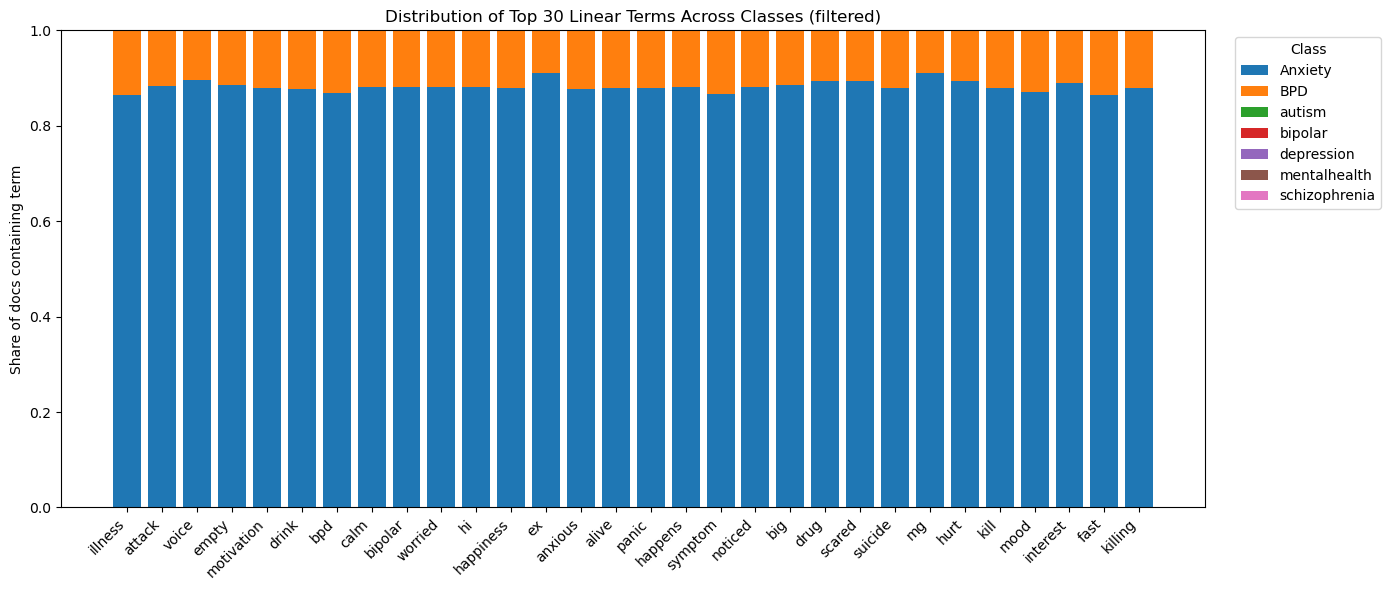

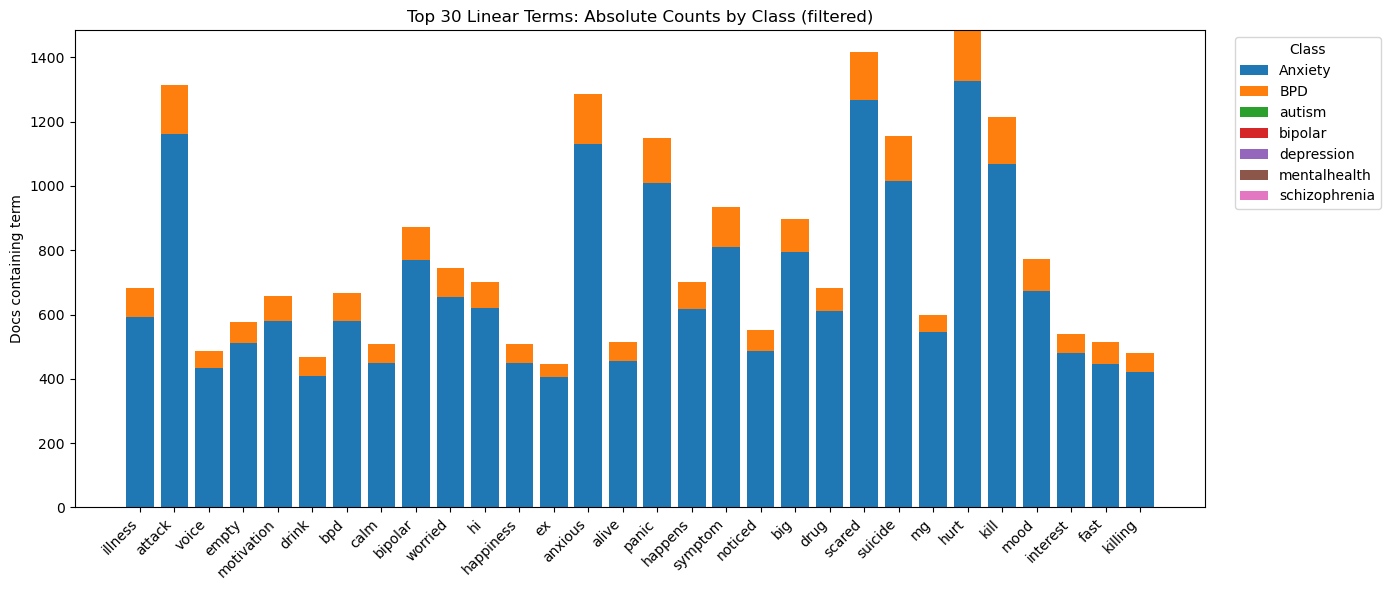

In [256]:
# --- Top 30 linear words (filtered) + distribution across classes ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tfidf_vec = vectorizer  # your fitted TfidfVectorizer

# 1) build the ranked linear-term table
lt = linear_terms.copy()
lt["abs_coef"] = lt["coef"].abs()
lt = lt.sort_values("abs_coef", ascending=False)

# get the readable token for each linear term
if "feature" in lt.columns and lt["feature"].notna().any():
    lt["term"] = lt["feature"].astype(str)
elif "rule" in rules.columns:
    lt["term"] = rules.loc[lt.index, "rule"].astype(str)
else:
    lt["term"] = lt.index.astype(str)

# 2) remove specific words (case-insensitive)
ban = {"depression", "anxiety", "depressed"}
lt = lt[~lt["term"].str.lower().isin(ban)]

# 3) keep only terms that exist in the TF-IDF vocabulary, take top 30
feat_names = np.array(tfidf_vec.get_feature_names_out())
idx_lookup = {t: i for i, t in enumerate(feat_names)}

valid_terms = [t for t in lt["term"].tolist() if t in idx_lookup]
top_k = 30
terms = valid_terms[:top_k]

# ---- print the words ----
print(f"Top {len(terms)} words (filtered):")
print(terms)

# 4) build presence matrix for those terms from sparse X_test
cols = [idx_lookup[t] for t in terms]
X_sub = X_test[:, cols]
presence = (X_sub > 0).astype(np.int32)

# labels (prefer string labels if available)
try:
    labels_series = pd.Series(y_test_str, name="label")
except NameError:
    labels_series = pd.Series(y_test, name="label")

classes = sorted(labels_series.unique())
presence_df = pd.DataFrame(presence.toarray(), columns=terms)

# counts per class and column-normalized distribution
counts = presence_df.groupby(labels_series).sum().reindex(classes)
dist = counts.div(counts.sum(axis=0), axis=1).fillna(0)

# 5a) distribution (shares) stacked chart
fig, ax = plt.subplots(figsize=(14, 6))
bottom = np.zeros(len(terms))
x = np.arange(len(terms))
for cls in classes:
    ax.bar(x, dist.loc[cls].values, bottom=bottom, label=str(cls))
    bottom += dist.loc[cls].values
ax.set_xticks(x)
ax.set_xticklabels(terms, rotation=45, ha="right")
ax.set_ylabel("Share of docs containing term")
ax.set_title("Distribution of Top 30 Linear Terms Across Classes (filtered)")
ax.legend(title="Class", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# 5b) absolute counts stacked chart (optional)
fig, ax = plt.subplots(figsize=(14, 6))
bottom = np.zeros(len(terms))
for cls in classes:
    ax.bar(x, counts.loc[cls].values, bottom=bottom, label=str(cls))
    bottom += counts.loc[cls].values
ax.set_xticks(x)
ax.set_xticklabels(terms, rotation=45, ha="right")
ax.set_ylabel("Docs containing term")
ax.set_title("Top 30 Linear Terms: Absolute Counts by Class (filtered)")
ax.legend(title="Class", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [261]:
# After you’ve built `counts` (rows=classes, cols=terms):
print("Docs containing any of the selected terms by class:")
print(counts.sum(axis=1).sort_values(ascending=False))

print("\nHow many of the selected terms appear at least once in each class:")
print((counts > 0).sum(axis=1).sort_values(ascending=False))


Docs containing any of the selected terms by class:
label
Anxiety          20770.0
BPD               2762.0
autism               0.0
bipolar              0.0
depression           0.0
mentalhealth         0.0
schizophrenia        0.0
dtype: float64

How many of the selected terms appear at least once in each class:
label
Anxiety          30
BPD              30
autism            0
bipolar           0
depression        0
mentalhealth      0
schizophrenia     0
dtype: int64


Top 30 words present in ALL classes (min 5/class, total ≥ 100), ranked by balance:
['diagnosing', 'insight', 'diagnosis', 'display', 'diagnose', 'inappropriate', 'evaluation', 'sensitivity', 'practitioner', 'researched', 'link', 'amazon', 'processing', 'speech', 'overload', 'official', 'undiagnosed', 'research', 'recognizing', 'offensive', 'suspected', 'curious', 'description', 'mod', 'paranoid', 'assessment', 'diagnosed', 'trained', 'identify', 'cbd']


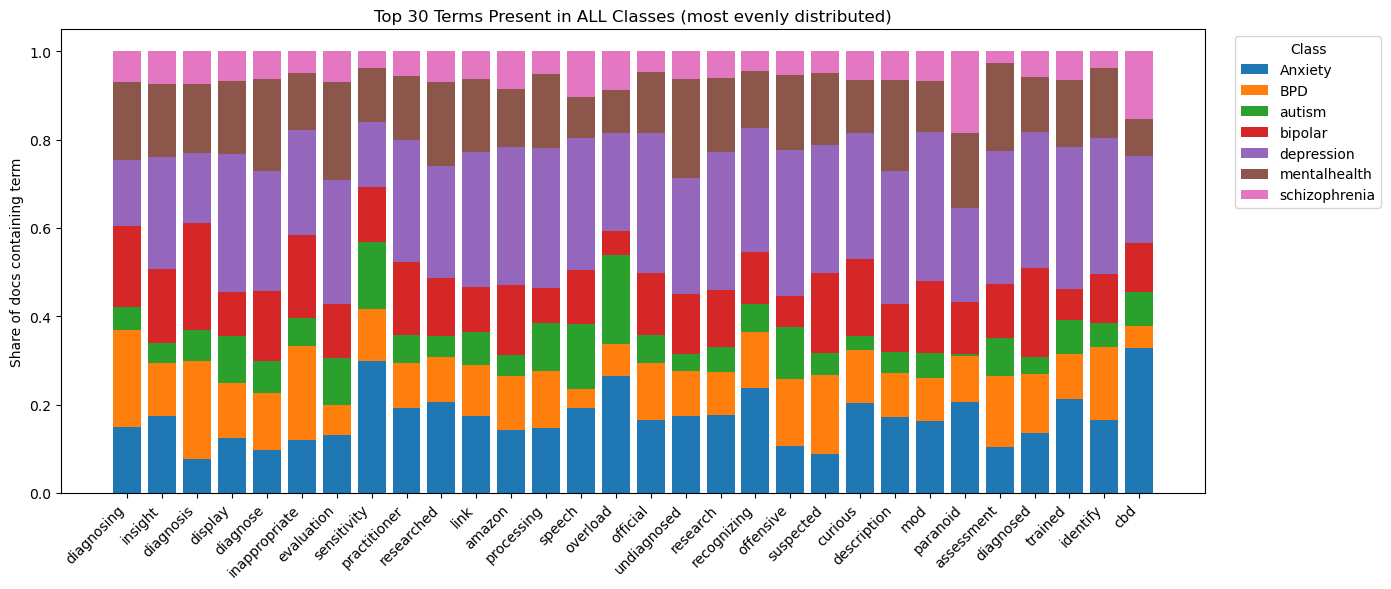

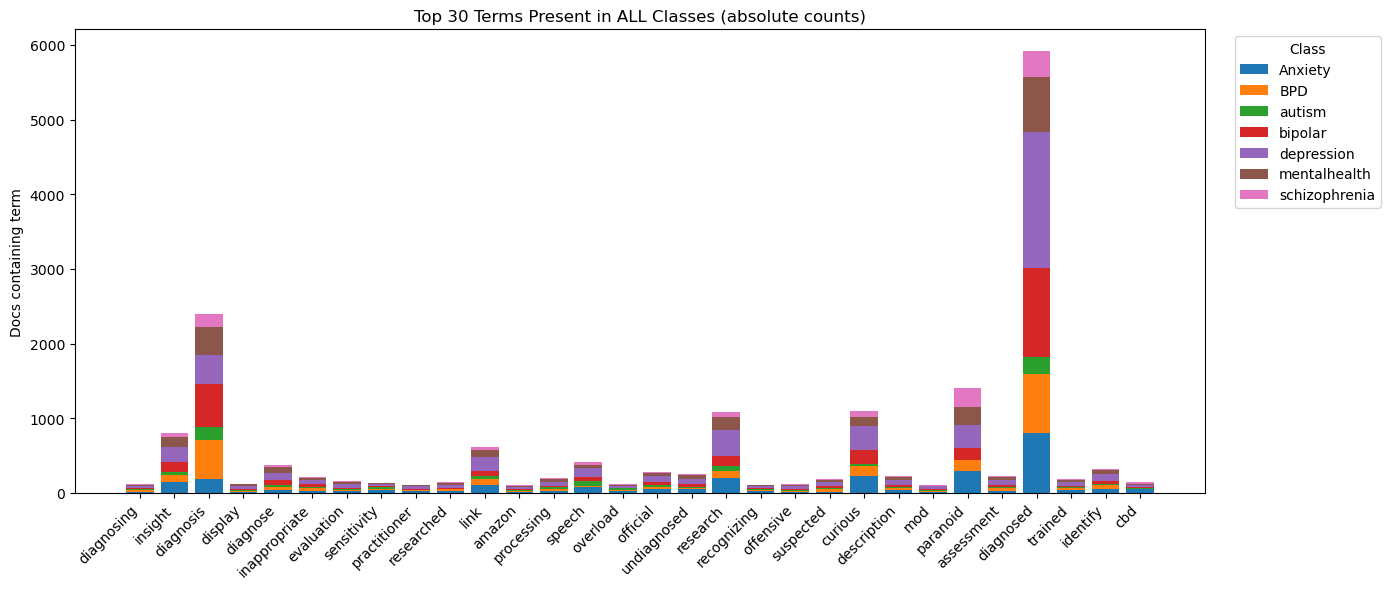

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tfidf_vec = vectorizer  # your fitted TfidfVectorizer
feat_names = np.array(tfidf_vec.get_feature_names_out())

# Labels (prefer strings if you have them)
try:
    labels_series = pd.Series(y_test_str, name="label")
except NameError:
    labels_series = pd.Series(y_test, name="label")

classes = sorted(labels_series.unique())

# 1) Build per-class term COUNTS directly from the sparse matrix (presence, not tf-idf value)
X_bin = (X_test > 0).astype(np.int32)

rows = []
for cls in classes:
    idx = np.where(labels_series.values == cls)[0]
    # sum presence for docs of this class
    row = np.asarray(X_bin[idx].sum(axis=0)).ravel()
    rows.append(row)

counts = pd.DataFrame(np.vstack(rows), index=classes, columns=feat_names)

# 2) (Optional) remove obvious label words
ban = {"depression", "depressed", "anxiety"}
if ban & set(counts.columns):
    counts = counts.loc[:, [t for t in counts.columns if t.lower() not in ban]]

# 3) Keep only terms that appear in ALL classes with a minimum per-class count
min_docs_per_class = 5     # adjust as you like (e.g., 1, 3, 10)
mask_all = (counts >= min_docs_per_class).all(axis=0)
counts_all = counts.loc[:, mask_all]

# 4) Score terms by how evenly they’re distributed across classes (entropy in [0,1])
tot = counts_all.sum(axis=0)
dist = counts_all.div(tot, axis=1).replace([np.inf, np.nan], 0.0)

entropy = -(dist * np.log(dist + 1e-12)).sum(axis=0) / np.log(len(classes))
entropy.name = "entropy"

# Also require a reasonable total count so we don’t pick ultra-rare tokens
min_total_docs = 100       # tweak if needed
candidates = entropy[tot >= min_total_docs].sort_values(ascending=False)

# 5) Select top 30 most evenly distributed terms
top_k = 30
terms = candidates.head(top_k).index.tolist()

print(f"Top {len(terms)} words present in ALL classes (min {min_docs_per_class}/class, total ≥ {min_total_docs}), ranked by balance:")
print(terms)

# 6) Plot distributions (shares)
counts_sel = counts.loc[:, terms]
dist_sel = counts_sel.div(counts_sel.sum(axis=0), axis=1).fillna(0)

fig, ax = plt.subplots(figsize=(14, 6))
bottom = np.zeros(len(terms))
x = np.arange(len(terms))
for cls in counts_sel.index:
    ax.bar(x, dist_sel.loc[cls].values, bottom=bottom, label=str(cls))
    bottom += dist_sel.loc[cls].values

ax.set_xticks(x)
ax.set_xticklabels(terms, rotation=45, ha="right")
ax.set_ylabel("Share of docs containing term")
ax.set_title("Top 30 Terms Present in ALL Classes (most evenly distributed)")
ax.legend(title="Class", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# 7) (Optional) absolute-counts stacked chart
fig, ax = plt.subplots(figsize=(14, 6))
bottom = np.zeros(len(terms))
for cls in counts_sel.index:
    ax.bar(x, counts_sel.loc[cls].values, bottom=bottom, label=str(cls))
    bottom += counts_sel.loc[cls].values
ax.set_xticks(x); ax.set_xticklabels(terms, rotation=45, ha="right")
ax.set_ylabel("Docs containing term")
ax.set_title("Top 30 Terms Present in ALL Classes (absolute counts)")
ax.legend(title="Class", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout(); plt.show()


In [307]:

def eval_and_plot(y_true, y_pred, title):
    acc = accuracy_score(y_true, y_pred)
    f1m = f1_score(y_true, y_pred, average="macro")
    print(f"\n=== {title} ===")
    print(f"Accuracy: {acc:.3f} | Macro-F1: {f1m:.3f}\n")
    print(classification_report(y_true, y_pred, digits=3))
    cm = confusion_matrix(y_true, y_pred, labels=sorted(set(y_true)))
    ConfusionMatrixDisplay(cm, display_labels=sorted(set(y_true))).plot(
        include_values=True, xticks_rotation=45
    )
    plt.title(title + " — Confusion Matrix")
    plt.tight_layout()
    plt.show()


C:\Users\91938\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



=== (A) TF-IDF (precomputed) + Logistic Regression ===
Accuracy: 0.775 | Macro-F1: 0.666

               precision    recall  f1-score   support

      Anxiety      0.788     0.756     0.772     17246
          BPD      0.839     0.567     0.677      7638
       autism      0.915     0.681     0.781      1428
      bipolar      0.816     0.600     0.692      8295
   depression      0.774     0.947     0.851     51679
 mentalhealth      0.540     0.222     0.315      7874
schizophrenia      0.722     0.480     0.576      3498

     accuracy                          0.775     97658
    macro avg      0.771     0.607     0.666     97658
 weighted avg      0.766     0.775     0.756     97658



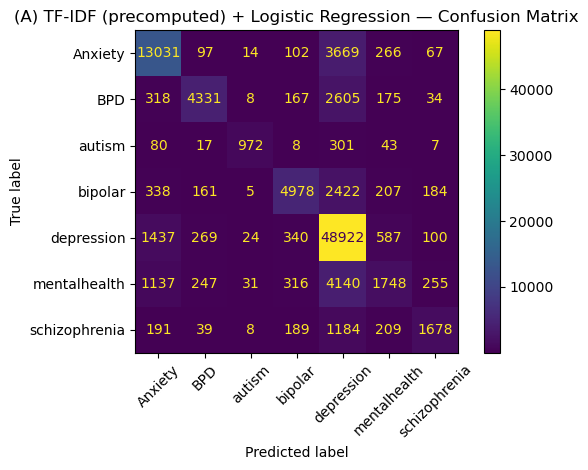

In [276]:
lr_A = LogisticRegression(max_iter=2000, solver="saga", multi_class="ovr", n_jobs=-1)
lr_A.fit(X_train, y_train)
pred_A = lr_A.predict(X_test)
eval_and_plot(y_test, pred_A, "(A) TF-IDF (precomputed) + Logistic Regression")


C:\Users\91938\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91938\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



=== (B) TF-IDF (precomputed) + LR (class_weight='balanced') ===
Accuracy: 0.699 | Macro-F1: 0.570

               precision    recall  f1-score   support

      Anxiety      0.767     0.752     0.759     17246
          BPD      0.626     0.668     0.646      7638
       autism      0.206     0.877     0.333      1428
      bipolar      0.690     0.639     0.663      8295
   depression      0.881     0.747     0.809     51679
 mentalhealth      0.342     0.341     0.342      7874
schizophrenia      0.328     0.668     0.440      3498

     accuracy                          0.699     97658
    macro avg      0.548     0.670     0.570     97658
 weighted avg      0.751     0.699     0.717     97658



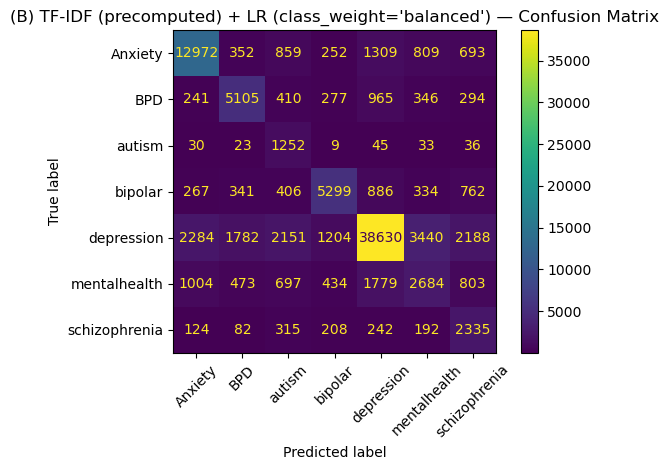

In [278]:
lr_B = LogisticRegression(
    class_weight="balanced",
    max_iter=2000, solver="saga", multi_class="ovr", n_jobs=-1
)
lr_B.fit(X_train, y_train)
pred_B = lr_B.predict(X_test)
eval_and_plot(y_test, pred_B, "(B) TF-IDF (precomputed) + LR (class_weight='balanced')")


Before: Counter({'depression': 206713, 'Anxiety': 68982, 'bipolar': 33182, 'mentalhealth': 31495, 'BPD': 30553, 'schizophrenia': 13994, 'autism': 5713})
After: Counter({'depression': 206713, 'schizophrenia': 206713, 'mentalhealth': 206713, 'bipolar': 206713, 'Anxiety': 206713, 'BPD': 206713, 'autism': 206713})


C:\Users\91938\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



=== (C) TF-IDF + RandomOverSampler + LR ===
Accuracy: 0.696 | Macro-F1: 0.608

               precision    recall  f1-score   support

      Anxiety      0.755     0.768     0.762     17246
          BPD      0.560     0.711     0.627      7638
       autism      0.441     0.833     0.576      1428
      bipolar      0.646     0.676     0.661      8295
   depression      0.891     0.707     0.789     51679
 mentalhealth      0.305     0.436     0.359      7874
schizophrenia      0.366     0.711     0.483      3498

     accuracy                          0.696     97658
    macro avg      0.566     0.692     0.608     97658
 weighted avg      0.748     0.696     0.712     97658



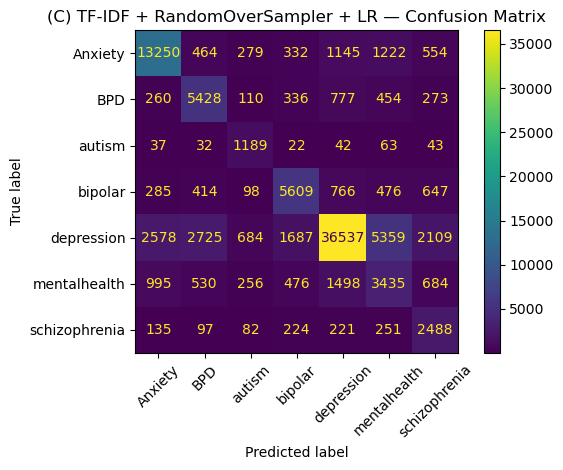

In [281]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Inspect class counts before/after oversampling (optional but useful)
print("Before:", Counter(y_train))

# FIXED: use "not majority" (space), not "not_majority"
ros = RandomOverSampler(sampling_strategy="not majority", random_state=42)
Xtr_ros, ytr_ros = ros.fit_resample(X_train, y_train)

print("After:", Counter(ytr_ros))

# Train & evaluate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

lr_C = LogisticRegression(max_iter=2000, solver="saga", multi_class="ovr", n_jobs=-1)
lr_C.fit(Xtr_ros, ytr_ros)

pred_C = lr_C.predict(X_test)

# Use your existing evaluator if present; otherwise print metrics + CM
try:
    eval_and_plot(y_test, pred_C, "(C) TF-IDF + RandomOverSampler + LR")
except NameError:
    acc = accuracy_score(y_test, pred_C)
    f1m = f1_score(y_test, pred_C, average="macro")
    print(f"Accuracy: {acc:.3f} | Macro-F1: {f1m:.3f}\n")
    print(classification_report(y_test, pred_C, digits=3))
    cm = confusion_matrix(y_test, pred_C, labels=sorted(set(y_test)))
    ConfusionMatrixDisplay(cm, display_labels=sorted(set(y_test))).plot(
        include_values=True, xticks_rotation=45
    )
    plt.title("(C) TF-IDF + RandomOverSampler + LR — Confusion Matrix")
    plt.tight_layout()
    plt.show()


Class counts: Counter({'depression': 206713, 'Anxiety': 68982, 'bipolar': 33182, 'mentalhealth': 31495, 'BPD': 30553, 'schizophrenia': 13994, 'autism': 5713})
Using k_neighbors=5 (min class count=5713)


C:\Users\91938\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



=== (D1) LSA (SVD 300) + SMOTE + LR ===
Accuracy: 0.678 | Macro-F1: 0.573

               precision    recall  f1-score   support

      Anxiety      0.754     0.747     0.750     17246
          BPD      0.505     0.656     0.571      7638
       autism      0.382     0.812     0.520      1428
      bipolar      0.587     0.634     0.610      8295
   depression      0.871     0.709     0.782     51679
 mentalhealth      0.301     0.379     0.335      7874
schizophrenia      0.338     0.645     0.443      3498

     accuracy                          0.678     97658
    macro avg      0.534     0.655     0.573     97658
 weighted avg      0.725     0.678     0.693     97658



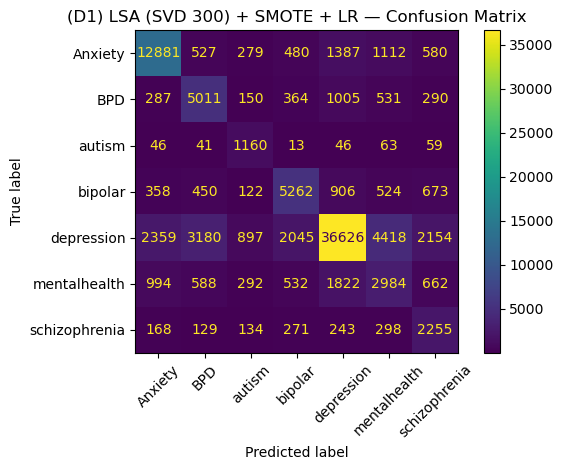

In [285]:
from collections import Counter
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# 1) Dense LSA embeddings from your sparse TF-IDF
svd = TruncatedSVD(n_components=300, random_state=42)
Xtr_svd = svd.fit_transform(X_train)
Xte_svd = svd.transform(X_test)

# 2) Choose a safe k_neighbors based on the smallest class size
counts = Counter(y_train)
n_min = min(counts.values())
k = max(1, min(5, n_min - 1))   # SMOTE requires k_neighbors < minority class count
print(f"Class counts: {counts}")
print(f"Using k_neighbors={k} (min class count={n_min})")

# FIXED: use "not majority" (space), not "not_majority"
smote = SMOTE(sampling_strategy="not majority", k_neighbors=k, random_state=42)
Xtr_sm, ytr_sm = smote.fit_resample(Xtr_svd, y_train)

# 3) Classifier + eval
lr_D1 = LogisticRegression(max_iter=2000, n_jobs=-1, multi_class="ovr")
lr_D1.fit(Xtr_sm, ytr_sm)
pred_D1 = lr_D1.predict(Xte_svd)

eval_and_plot(y_test, pred_D1, "(D1) LSA (SVD 300) + SMOTE + LR")


In [289]:
%pip install -q sentence-transformers

Note: you may need to restart the kernel to use updated packages.


Class counts: Counter({'depression': 206713, 'Anxiety': 68982, 'bipolar': 33182, 'mentalhealth': 31495, 'BPD': 30553, 'schizophrenia': 13994, 'autism': 5713}) | Using k_neighbors=5


C:\Users\91938\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



=== (D1) LSA (SVD 300) + SMOTE + LR ===
Accuracy: 0.678 | Macro-F1: 0.573

               precision    recall  f1-score   support

      Anxiety      0.754     0.747     0.750     17246
          BPD      0.505     0.656     0.571      7638
       autism      0.382     0.812     0.520      1428
      bipolar      0.587     0.634     0.610      8295
   depression      0.871     0.709     0.782     51679
 mentalhealth      0.301     0.379     0.335      7874
schizophrenia      0.338     0.645     0.443      3498

     accuracy                          0.678     97658
    macro avg      0.534     0.655     0.573     97658
 weighted avg      0.725     0.678     0.693     97658



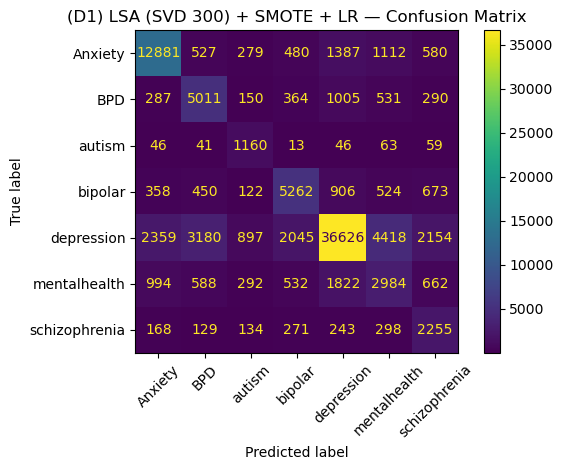

In [293]:
from collections import Counter
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

svd = TruncatedSVD(n_components=300, random_state=42)
Xtr_svd = svd.fit_transform(X_train)
Xte_svd = svd.transform(X_test)

counts = Counter(y_train)
n_min = min(counts.values())
k = max(1, min(5, n_min - 1))
print(f"Class counts: {counts} | Using k_neighbors={k}")

smote = SMOTE(sampling_strategy="not majority", k_neighbors=k, random_state=42)
Xtr_sm, ytr_sm = smote.fit_resample(Xtr_svd, y_train)

lr = LogisticRegression(max_iter=2000, n_jobs=-1, multi_class="ovr")
lr.fit(Xtr_sm, ytr_sm)
pred = lr.predict(Xte_svd)
eval_and_plot(y_test, pred, "(D1) LSA (SVD 300) + SMOTE + LR")


In [16]:
# Export minimal data + your current split
import pandas as pd, pathlib as p
p.Path("BERT").mkdir(exist_ok=True)

# Save the text+label table
assert 'Combined' in df.columns and 'Subreddit' in df.columns
df[['Combined','Subreddit']].to_parquet("bert_data/text_labels.parquet", index=True)

# Save the exact train/test indices if you have Series splits
if isinstance(y_train, pd.Series) and isinstance(y_test, pd.Series):
    pd.Series(y_train.index, name="idx").to_csv("bert_data/train_idx.csv", index=False)
    pd.Series(y_test.index,  name="idx").to_csv("bert_data/test_idx.csv",  index=False)
    print("Wrote bert_data/text_labels.parquet + train_idx.csv + test_idx.csv")
else:
    print("y_train/y_test are not pandas Series with indices; you can still make a fresh stratified split in the new notebook.")


NameError: name 'df' is not defined